In [1]:
using LinearAlgebra
using PyPlot

In [2]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 8
rcParams["axes.titlesize"] = 8

8

In [3]:
include("expm_de.jl")

expm_de (generic function with 2 methods)

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


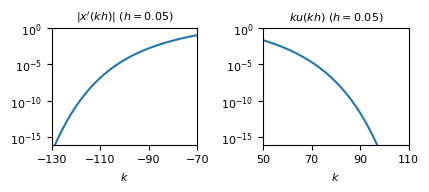

In [4]:
h = 0.05

k1 = collect(-130:-70)
y1 = @. om99_dx(k1, h)

β = 0.25
α = β / sqrt(1 + log(1+π/h)/(4h))
k2 = collect(50:110)
t = @. k2 * h
v = @. -2t + α * expm1(-t) - β * expm1(t)
u = @. exp(v) / - expm1(v) # = h*x/(π*t) - 1 
y2 = @. k2 * u

fig, ax = subplots(1, 2, figsize=[11, 5]/2.54)
ax[1].plot(k1, y1)
ax[1].set_title("\$|x'(kh)| ~ (h=0.05)\$")
ax[1].set_yscale("log")
ax[1].set_xlim(-130, -70)
ax[1].set_ylim(1e-16, 1e0)
ax[1].set_xticks([-130, -110, -90, -70])
ax[1].set_yticks([1e-15, 1e-10, 1e-5, 1e0])
ax[1].set_xlabel("\$k\$")

ax[2].plot(k2, y2)
ax[2].set_title("\$ku(kh) ~ (h=0.05)\$")
ax[2].set_yscale("log")
ax[2].set_xlim(50, 110)
ax[2].set_ylim(1e-16, 1e0)
ax[2].set_xticks([50, 70, 90, 110])
ax[2].set_yticks([1e-15, 1e-10, 1e-5, 1e0])
ax[2].set_xlabel("\$k\$")

fig.tight_layout()
fig.savefig("fig/example_summand.pdf")
show()